In [1]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T



In [3]:
# Equação Diferencial
# d²T/dx² = 1 ; x E (0,1)


# Define variável
x = sp.symbols('x')
x0 = 0
x1 = 1

# EDO
Temp = sp.Function('T')(x)
F = sp.Eq((sp.diff(Temp,x,2)),1)

print(sp.latex(F))


# Solução analítica:
f_analitica = (x**2)/2 - x/2

# Solução por Resíduos ponderados:
# Base {1,x,x^2}

a0 = sp.symbols('a0')
a1 = sp.symbols('a1')
a2 = sp.symbols('a2')

f_residuos_pond = a0+a1*x+a2*x**2

# Defino o residuo
residuo = sp.diff(f_residuos_pond,x,2) -1

# Ortogonalizo em relação a função peso - Integral de 0 a 1 de residuo*w(x) = 0
w = sp.Function('w')(x)

integral_ortogonalizacao = sp.integrate(residuo*w,(x,x0,x1))

eq_ortogonalizacao = sp.Eq(integral_ortogonalizacao, 0)

sp.pprint(eq_ortogonalizacao)

print(sp.latex(eq_ortogonalizacao))
## Com a Equação de Ortogonalização, eu consigo atribuir valores para a base w, e começar a avaliar as soluções

\frac{d^{2}}{d x^{2}} T{\left(x \right)} = 1
           1            
           ⌠            
(2⋅a₂ - 1)⋅⎮ w(x) dx = 0
           ⌡            
           0            
\left(2 a_{2} - 1\right) \int\limits_{0}^{1} w{\left(x \right)}\, dx = 0


In [4]:
# Função de ponderação com mesma base que a solução

# Base {1,x,x^2}

b0 = sp.symbols('b0')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

w1 = b0+b1*x+b2*x**2
print(sp.latex(w1))

# Monta sistema
equacoes = []
integral = sp.integrate(residuo * w1, (x, x0, x1))
sp.pprint(integral)

cc1 = sp.Eq(f_residuos_pond.subs(x, 0), 0)
cc2 = sp.Eq(f_residuos_pond.subs(x, 1), 0)

equacoes.append(integral)
# print(sp.latex(integral))
equacoes.append(cc1)
# print(sp.latex(cc1))

equacoes.append(cc2)
# print(sp.latex(cc2))



# Resolve sistema
sol = sp.solve(equacoes, (a0, a1, a2))
T_final1 = f_residuos_pond.subs(sol)

sp.pprint(T_final1)
print(sp.latex(T_final1))


b_{0} + b_{1} x + b_{2} x^{2}
                  2⋅a₂⋅b₂        b₁   b₂
2⋅a₂⋅b₀ + a₂⋅b₁ + ─────── - b₀ - ── - ──
                     3           2    3 
 2    
x    x
── - ─
2    2
\frac{x^{2}}{2} - \frac{x}{2}


In [5]:
# Função de ponderação com base de Delta de Dirac

b0 = sp.symbols('b0')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

# w2 = b0 * sp.DiracDelta(x - 1/4) + b1 * sp.DiracDelta(x - 1/2) + b2 * sp.DiracDelta(x - 3/4)
w2 = sp.DiracDelta(x - 1/4) + sp.DiracDelta(x - 1/2) + sp.DiracDelta(x - 3/4)
print(sp.latex(w2))

# Monta sistema
equacoes = []
integral = sp.integrate(residuo * w2, (x, x0, x1))
sp.pprint(integral)

cc1 = sp.Eq(f_residuos_pond.subs(x, 0), 0)
cc2 = sp.Eq(f_residuos_pond.subs(x, 1), 0)

equacoes.append(integral)
print(sp.latex(integral))
equacoes.append(cc1)
print(sp.latex(cc1))

equacoes.append(cc2)
print(sp.latex(cc2))



# Resolve sistema
sol = sp.solve(equacoes, (a0, a1, a2))
T_final2 = f_residuos_pond.subs(sol)

sp.pprint(T_final2)
print(sp.latex(T_final2))


\delta\left(x - 0.75\right) + \delta\left(x - 0.5\right) + \delta\left(x - 0.25\right)
6⋅a₂ - 3
6 a_{2} - 3
a_{0} = 0
a_{0} + a_{1} + a_{2} = 0
 2    
x    x
── - ─
2    2
\frac{x^{2}}{2} - \frac{x}{2}


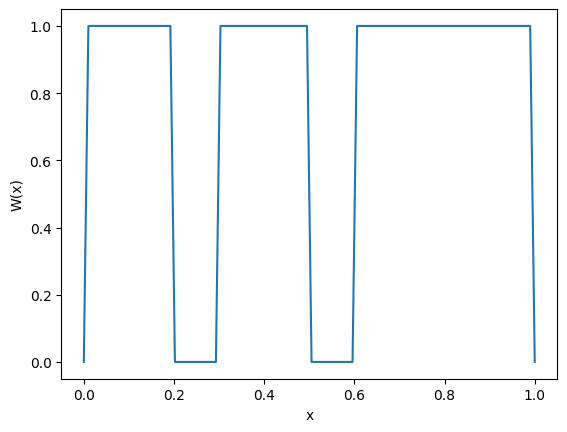

\theta\left(x, 0\right) - \theta\left(x - 1, 1\right) + \theta\left(x - 0.6, 0\right) - \theta\left(x - 0.5, 1\right) + \theta\left(x - 0.3, 0\right) - \theta\left(x - 0.2, 1\right)
1.6⋅a₂ - 0.8
1.6 a_{2} - 0.8
a_{0} = 0
a_{0} + a_{1} + a_{2} = 0
     2        
0.5⋅x  - 0.5⋅x
0.5 x^{2} - 0.5 x


In [8]:
# Função de ponderação com base de Heaviside

# Base {1,x,x^2}

b0 = sp.symbols('b0')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

w3 = (sp.Heaviside(x - 0,0) - sp.Heaviside(x - 0.2,1)) + (sp.Heaviside(x - 0.3,0) - sp.Heaviside(x - 0.5,1)) + (sp.Heaviside(x - 0.6,0) - sp.Heaviside(x - 1,1))
# w3 = (sp.Heaviside(x - 0) - sp.Heaviside(x - 0.2)) + (sp.Heaviside(x - 0.3) - sp.Heaviside(x - 0.5)) + (sp.Heaviside(x - 0.6) - sp.Heaviside(x - 1))
T.prepara_plot(w3,x,x0,x1,"Heaviside")
plt.xlabel('x')
plt.ylabel('W(x)')
plt.show()

print(sp.latex(w3))

# Monta sistema
equacoes = []
integral = sp.integrate(residuo * w3, (x, x0, x1))
sp.pprint(integral)

cc1 = sp.Eq(f_residuos_pond.subs(x, 0), 0)
cc2 = sp.Eq(f_residuos_pond.subs(x, 1), 0)

equacoes.append(integral)
print(sp.latex(integral))
equacoes.append(cc1)
print(sp.latex(cc1))

equacoes.append(cc2)
print(sp.latex(cc2))



# Resolve sistema
sol = sp.solve(equacoes, (a0, a1, a2))
T_final3 = f_residuos_pond.subs(sol)

sp.pprint(T_final3)
print(sp.latex(T_final3))
